<a href="https://colab.research.google.com/github/Elariti/GD3DGR-grain-matching-demo/blob/main/grain_matching_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python matplotlib

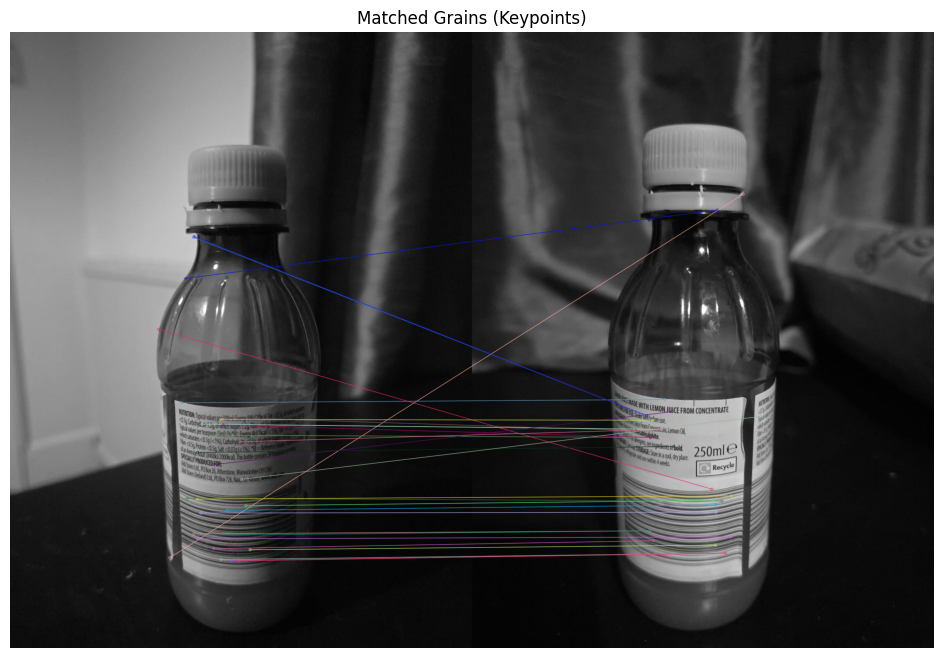

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread('view1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('view2.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()


kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)


good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)


plt.figure(figsize=(15, 8))
plt.imshow(matched_img)
plt.axis('off')
plt.title("Matched Grains (Keypoints)")
plt.show()
